
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [39]:
# import pandas and numpy
import pandas as pd
import numpy as np


In [40]:
# load TMDb movie data into data frame
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
# display first five rows of data, have a look at the data
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [41]:
#display the columns of the data set
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<a id='intro'></a>
## Introduction

### Dataset Description :
>This dataset, sourced from The Movie Database (TMDb), encompasses detailed information on 10,000 films across different years.
 Below is a table providing a brief description of each column within the dataset:
 
### Columns Description
 
| **Column Name**         | **Description**                                                                                                                                               |
|:------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `id`                    | Unique identifier for each movie.                                                                                                                              |
| `imdb_id`               | Unique identifier for each movie on IMDb.                                                                                                                      |
| `popularity`            | Popularity score of the movie.                                                                                                                                 |
| `budget`                | Budget allocated for the movie.                                                                                                                                |
| `revenue`               | Total revenue generated by the movie.                                                                                                                          |
| `original_title`        | The original title of the movie.                                                                                                                               |
| `cast`                  | List of cast members in the movie, separated by a pipe (`\|`) character.                                                                                        |
| `homepage`              | Website homepage associated with the movie.                                                                                                                     |
| `director`              | Director(s) of the movie.                                                                                                                                      |
| `tagline`               | Tagline or slogan of the movie.                                                                                                                                |
| `keywords`              | Keywords associated with the movie, separated by a pipe (`\|`) character.                                                                                        |
| `overview`              | Brief overview or summary of the movie.                                                                                                                         |
| `runtime`               | Duration of the movie in minutes.                                                                                                                              |
| `genres`                | Genres of the movie, separated by a pipe (`\|`) character.                                                                                                       |
| `production_companies`  | Production companies involved in making the movie, separated by a pipe (`\|`) character.                                                                         |
| `release_date`          | Date when the movie was released.                                                                                                                              |
| `vote_count`            | Total number of votes the movie has received.                                                                                                                   |
| `vote_average`          | Average rating of the movie.                                                                                                                                   |
| `release_year`          | Year when the movie was released.                                                                                                                              |
| `budget_adj`            | Budget of the movie adjusted for inflation to 2010 dollar values.                                                                                               |
| `revenue_adj`           | Revenue of the movie adjusted for inflation to 2010 dollar values.                                                                                              |
 



### Question(s) for Analysis

#### "After reviewing the columns and rows of the dataset, many questions came to my mind that I really want to know the answers to, but the most important ones for me were:"
* which movies genres have the highest and lowest rateavarage?
 * how these variables (budget)(cast) can affect the revenue ? for example: Is there a correlation between the presence of certain actors and revenues?
  
* Is there a correlation between release month and movie success?

* What is the distribution of movies' release years?

* do people prefer long movies or not?

* how have the profits of prouction companies changed over the years?




<a id='wrangling'></a>
## Data Wrangling



In [42]:
#Try finding the overall size of the dataframe.
print(f"number of rows ={df.shape[0]} and number of columns ={df.shape[1]} ")

number of rows =10866 and number of columns =21 


In [43]:
#datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

I note that most data types is object which is actually string because as we know (strings will appear as objects in pandas)

In [44]:
#I want to know if there is null values in the dataset so I will use info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

there are columns have null values such as : homepage,tagline,production_companies...etc while some columns like id ,budget dont have any null values because (Non-null count) exactlly equal the number of rows in the dataset 

In [45]:
# i want to  see the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


from id column we can notes that there is two rows have the same 'id'<br> 
explanation:<br>
total number of rows=10866<br>
total number of unique id's=10865

In [46]:
# descriptive statistics for each column of data
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

from above table I notes many things:<br>
   
   * it doesnt make a sence that budget spend to produce 50% of movies in dataset is zero
   * also, 50% of movies dosen't make any revenue <br>
   * same problem of budget_adj column and revenue_adj column almost 50% of values is zero<br>
   * it doesnt make a sence that a movie can have a duration of 0 min<br>
    so there are many problems in data in this dataset


### Data Cleaning

 

### Missing Data (numaric columns)
 I notes that there is no null values in the numaric datatype columns ,but there is some problems with the values so let's fix them:

In [47]:
#total number of rows:
total_movies=df.shape[0]
print(f"number of total movies in the dataset {total_movies}")
print('-----------------------------------------------------------------------------------------')
zero_budget=(df['budget']==0).sum()
print(f"number of movie with zero budget {zero_budget}")
print(f'Percentage of movies with a budget of zero: { zero_budget/ total_movies * 100}%')
print('-----------------------------------------------------------------------------------------')
zero_rev=(df['revenue']==0).sum()
print(f"number of movie with zero revenue {zero_rev}")
print(f'Percentage of movies with a revenue of zero: { zero_rev/ total_movies * 100}%')
print("-----------------------------------------------------------------------------------------")
zero_budget_adj=(df['budget_adj']==0).sum()
print(f"number of movie with zero budget_adj {zero_budget_adj}")
print("-----------------------------------------------------------------------------------------")
zero_rev_adj=(df['revenue_adj']==0).sum()
print(f"number of movie with zero revenue_adj {zero_rev_adj}")
print("-----------------------------------------------------------------------------------------")
print(f"movies with zero duration= {(df['runtime']==0).sum()}")

number of total movies in the dataset 10866
-----------------------------------------------------------------------------------------
number of movie with zero budget 5696
Percentage of movies with a budget of zero: 52.42039388919566%
-----------------------------------------------------------------------------------------
number of movie with zero revenue 6016
Percentage of movies with a revenue of zero: 55.365359838026876%
-----------------------------------------------------------------------------------------
number of movie with zero budget_adj 5696
-----------------------------------------------------------------------------------------
number of movie with zero revenue_adj 6016
-----------------------------------------------------------------------------------------
movies with zero duration= 31


* I notes that nearly 52% of movies have zero budget and 55% of movies have zero revenue ..we have same problem with(budget_adj,revenue_adj) ..its a large percentage so instead of drop them i will replace them with the mean of the their column 
* also having movies with zero minute duration doesn't make a sense so let's replace zero with mean of the runtime column

In [48]:
#
def rep_with_mean(col,replaced_value):
    """ replacing specified value with mean of the current  column:"""
    mean_val=np.mean(df[col])
    df[col]=df[col].replace(replaced_value,mean_val)
    #list of columns need to be fixed
cols=['budget','revenue','runtime','budget_adj','revenue_adj']

for i in cols:
 rep_with_mean(i,0)


In [49]:
#i want to check my work by using describe method
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  2.229255e+07  6.187164e+07    102.362065   
std     92130.136561      1.000185  2.801245e+07  1.110204e+08     30.902781   
min         5.000000      0.000065  1.000000e+00  2.000000e+00      2.000000   
25%     10596.250000      0.207583  1.462570e+07  3.982332e+07     90.000000   
50%     20669.000000      0.383856  1.462570e+07  3.982332e+07     99.000000   
75%     75610.000000      0.713817  1.500000e+07  3.982332e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  2.675136e+07  7.980243e+07  
std      575.619058      0.935142     12.812941  3.050850e+07  1.365610e+08  
min       10.000000      1.500000   1960.000000  9.210911e-01  2.370705e+00  
25%       17.000000      5.400000   1995.000000  1.755104e+07  5.136436e+07  
50%       38.000000      6.000000   2006.000000  1.755104e+07  5.136436e+07  
75%      145.750000      6.600000   2011.000000  2.085325e+07  5.136436e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

ok, now the data makes more sence and will give better results

### Incorrect Data Types(release_date)
  convert a string representation of a release_date into a datetime object.

In [50]:
df['release_date'] = pd.to_datetime(df['release_date'])

### Missing Data (String columns)
Most columns of type string contain null values 

In [51]:
# finding number of null values in each string columns
selected_columns = df.loc[:, [col for col in df.columns if type(df[col].iloc[0])==str ]]

print(selected_columns.isnull().sum())

imdb_id                   10
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64


so as we notes from above information that columns like imdb_id,cast,overview...etc have a few null values so i gonna replace them with value of 'unknown'  but values like homepage have more than 70% null values and its not important in my analysis so i gonna drop it

In [52]:
# drop homepage column from df
df.drop(['homepage'], axis=1, inplace=True)

In [53]:
selected_columns.drop(['homepage'], axis=1, inplace=True)

#fill non values in string columns with "unknown" word 
str_column = np.array(selected_columns.columns)

for i in str_column:
 df[i]=df[i].fillna('unknown')


## Duplicates
now let's cheack if there is duplicates in the rows of this dataframe

In [54]:
# find the number of duplicated rows
print(f'number of duplicated rows : {np.sum(df.duplicated())}')
print("\n")
duplicates = df.duplicated()
# Select duplicated rows based on the boolean Series
duplicated_rows = df[duplicates]
# Display the duplicated row
print("the duplicated row \n")
duplicated_rows.head()


number of duplicated rows : 1


the duplicated row 



id    imdb_id  popularity      budget   revenue original_title  \
2090  42194  tt0411951     0.59643  30000000.0  967000.0         TEKKEN   

                                                   cast          director  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                  tagline                                           keywords  \
2090  Survival is no game  martial arts|dystopia|based on video game|mart...   

                                               overview  runtime  \
2090  In the year of 2039, after World Wars destroy ...     92.0   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  budget_adj  \
2090   2010-03-20         110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0

In [55]:
#drop the duplicated row from dataset
df.drop_duplicates(inplace=True)
#check is there is still any duplicated rows
print(f'number of duplicated rows : {np.sum(df.duplicated())}')

number of duplicated rows : 0


* now, let's check the dimention of dataframe .. the null values.. and datatype of each column :

In [56]:
print(f">>>> number of rows ={df.shape[0]} and number of columns ={df.shape[1]} \n")

df.info()

>>>> number of rows =10865 and number of columns =20 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10865 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  float64       
 4   revenue               10865 non-null  float64       
 5   original_title        10865 non-null  object        
 6   cast                  10865 non-null  object        
 7   director              10865 non-null  object        
 8   tagline               10865 non-null  object        
 9   keywords              10865 non-null  object        
 10  overview              10865 non-null  object        
 11  runtime               10865 non-null  float64       
 12  genres             

* number of columns= 20 because we have drop 'homebage' column and number of rows= 10865 because we have droped one duplicated row
* all columns have values (there is no null vlaues)
* each column has the apropiate datatype 


**note:** before we drop the duplicated row
the number of rows was 10866 and the number of unique values in id column is 10865 but now after we drop the duplicated row
the number of unique (id's) is exactlly equal the number of rows in the dataset

## Data Type Optimization
Fixing DataTypes, and show how altering the data types can shrink the memory footprint of a DataFrame.

In [57]:
# using describe methode to know the limits of each column
df.describe().loc[["min", "max"]]

id  popularity       budget       revenue  runtime  vote_count  \
min       5.0    0.000065          1.0  2.000000e+00      2.0        10.0   
max  417859.0   32.985763  425000000.0  2.781506e+09    900.0      9767.0   

     vote_average  release_year    budget_adj   revenue_adj  
min           1.5        1960.0  9.210911e-01  2.370705e+00  
max           9.2        2015.0  4.250000e+08  2.827124e+09

* by have a look at min and max vlaues for coulmns(vote_count,release_year) datatype 'int16' will be more apprpiate  for them and less memory disepation

* by have a look at min and max values for columns(vote_avarage,popularity) datatype 'float32' will be appropiate for them and less


In [58]:
#get some information about the datatypes
print(np.iinfo("int16"))
print(np.finfo("float32"))
# Change the data type of some columns
df['vote_count'] = df['vote_count'].astype('int16')
df['release_year'] = df['release_year'].astype('int16')
df['vote_average'] = df['vote_average'].astype('float32')
df['popularity'] = df['popularity'].astype('float32')

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------



### String Optimization
by looking at object columns 

In [59]:
#object columns list:
print(f"String vlue columns : {str_column}"  )
df.nunique()

String vlue columns : ['imdb_id' 'original_title' 'cast' 'director' 'tagline' 'keywords'
 'overview' 'genres' 'production_companies']


id                      10865
imdb_id                 10856
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10720
director                 5068
tagline                  7998
keywords                 8805
overview                10848
runtime                   247
genres                   2040
production_companies     7446
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

columns with a low number of unique values : geners,director can be converted to category

In [60]:
#convert data type from string to category
df['director'] = df['director'].astype('category')
df['genres'] = df['genres'].astype('category')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10865 non-null  object        
 2   popularity            10865 non-null  float32       
 3   budget                10865 non-null  float64       
 4   revenue               10865 non-null  float64       
 5   original_title        10865 non-null  object        
 6   cast                  10865 non-null  object        
 7   director              10865 non-null  category      
 8   tagline               10865 non-null  object        
 9   keywords              10865 non-null  object        
 10  overview              10865 non-null  object        
 11  runtime               10865 non-null  float64       
 12  genres                10865 non-null  category      
 13  production_compa

 By changing some columns datatypes, we further reduced our dataset from 1.7+ MB to 1.6+ MB 

# explode
* explode based on cast:

In [62]:
#get rid of unknown cast
df_cast_filtered = df[df['cast'] != 'unknown'].copy()
#convert string seperated by pipe ('|') to list of actors
df_cast_filtered['cast'] = df_cast_filtered['cast'].str.split('|')
# explode the lists 
df_cast_filtered = df_cast_filtered.explode('cast')


* explode based on production_companies:


In [63]:
#get rid of unknown cast
df_production_companies_filtered = df[df['production_companies'] != 'unknown'].copy()
#convert string seperated by pipe ('|') to list of production_companies
df_production_companies_filtered['production_companies'] = df_production_companies_filtered['production_companies'].str.split('|')
# explode the lists 
df_production_companies_filtered=df_production_companies_filtered.explode('production_companies')

* explode based on genres:

In [64]:
#get rid of unknown cast
df_genres_filtered = df[df['genres'] != 'unknown'].copy()
#convert string seperated by pipe ('|') to list of genres
df_genres_filtered['genres'] = df_genres_filtered['genres'].str.split('|')
# explode the lists 
df_genres_filtered=df_genres_filtered.explode('genres')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 ( which movies genres have the highest and lowest rateavarage?)

In [65]:
#grouping rows base on there gernes and find vote_average mean of each gerne
genres_rate=df_genres_filtered.groupby('genres',as_index=False)["vote_average"].mean()
#sorting the result in descending order
genres_rate=genres_rate.sort_values(by='vote_average', ascending=False)

<AxesSubplot: title={'center': 'geners vs vote average'}, xlabel='genres', ylabel='vote average'>

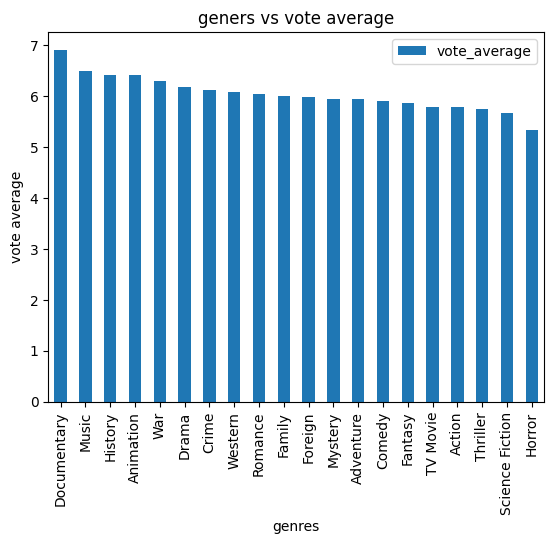

In [66]:
genres_rate.plot(kind='bar',x='genres',y='vote_average',ylabel='vote average',title='geners vs vote average')

according to above plot  movies genres have the highest vote is "Documnetray" and the lowest is "Horror"

### Research Question 2  (Is there a correlation between release month and movie success?)

In [67]:
#extract month from release_date and store it in new column 
df['release_month'] = pd.to_datetime(df['release_date']).dt.month
##grouping rows base on there release_month and find vote_average mean of each month
released_month=df.groupby('release_month',as_index=False)['vote_average'].mean()
released_month

release_month  vote_average
0               1      5.870620
1               2      5.918524
2               3      5.928102
3               4      5.875533
4               5      5.967985
5               6      6.012092
6               7      5.928410
7               8      5.840087
8               9      6.068069
9              10      5.959844
10             11      6.062654
11             12      6.189442

<AxesSubplot: title={'center': 'release month vs vote average'}, xlabel='release_month'>

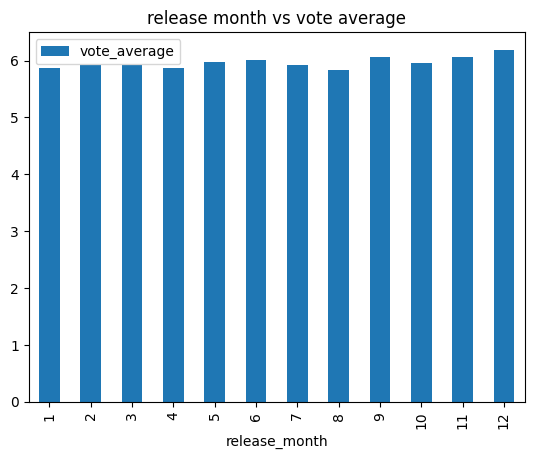

In [68]:
# plot bar chart between release month and vote average
released_month.plot(kind="bar",x='release_month',y='vote_average',title='release month vs vote average')

movies released at december over the years have the highest vote_average compared to other monthes

## Research Question 3 (how these  variables (budget-cast) can affect the revenue ?)
  for example: Is there a correlation between the presence of certain actors and revenues?)

* ### *budget-revenue*

<AxesSubplot: title={'center': 'budget_adj vs revenue_adj'}, xlabel='budget_adj', ylabel='revenue_adj'>

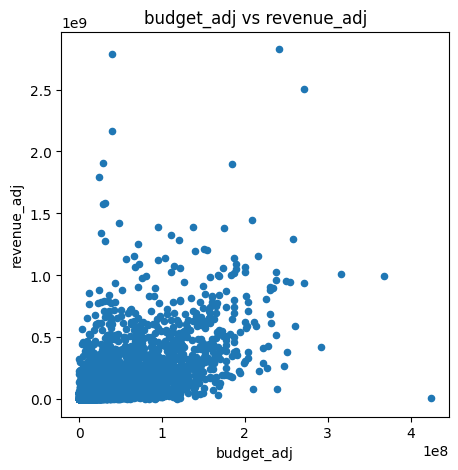

In [69]:
df.plot(kind='scatter',x='budget_adj',y='revenue_adj',figsize=(5,5),title='budget_adj vs revenue_adj')


The analysis shows a slight positive correlation between movie budgets and revenue, meaning higher budgets generally lead to higher revenues. However, the weak correlation indicates that budget is only one factor among many that influence a movie's financial success.

* ### *actor_revenue*

In [70]:
##grouping rows based on actor with sum of revenues of movies he/her act in:
actor_revenue = df_cast_filtered.groupby(by='cast',as_index=False)['revenue_adj'].sum()


In [71]:
#sorting the result in descending order
actor_revenue=actor_revenue.sort_values(by='revenue_adj', ascending=False)



In [72]:
#list of top ten actors
top_actores=actor_revenue.iloc[0:10,0:2]
top_actores

cast   revenue_adj
6895       Harrison Ford  1.499167e+10
17862         Tom Cruise  1.136689e+10
17877          Tom Hanks  1.113466e+10
16078  Samuel L. Jackson  9.158457e+09
5133        Eddie Murphy  8.983305e+09
7244        Ian McKellen  8.979509e+09
9167         Johnny Depp  8.975439e+09
2508        Bruce Willis  8.972152e+09
5519         Emma Watson  8.857702e+09
4061    Daniel Radcliffe  8.720540e+09

The presence of high-profile actors significantly impacts a movie’s revenue, as evidenced by the top ten actors identified in this analysis.

In [73]:
#list of poor ten actors
poor_actros=actor_revenue.iloc[-10:,0:2]
poor_actros

cast  revenue_adj
3823            Cristina Raines    10.793343
3062          Charlotte BÃ¸ving    10.296367
16922  Steinn Ãrmann MagnÃºsson    10.296367
10486         KristbjÃ¶rg Kjeld    10.296367
7037           Helgi BjÃ¶rnsson    10.296367
889                Andrea Renzi     9.115080
2768       Carolina Crescentini     9.115080
5906             Flavio Parenti     9.115080
12009              Martha Burns     8.585801
13592                Nick Towne     3.038360

The adjusted revenue for the actors listed ranges from approximately [ 3.04 - 10.79 ] million. These figures are significantly lower than those of top-grossing actors.

### Research Question 4 (What is the distribution of movies' release years?)

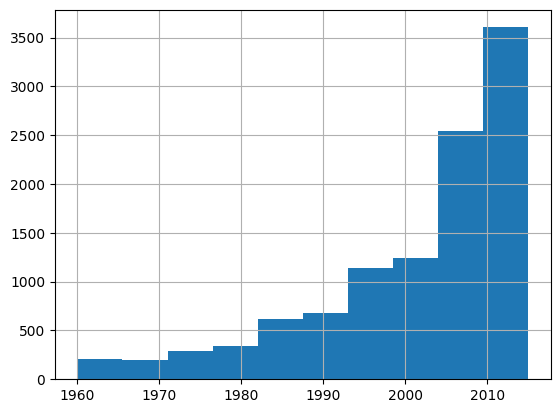

In [74]:
#plot histogram for release_year
df['release_year'].hist();

upward trend: indicating the production of films increases with time progress

### Research Question 5 (* do people prefer long movies or not?)

<AxesSubplot: title={'center': 'runtime vs vote average'}, xlabel='runtime', ylabel='vote_average'>

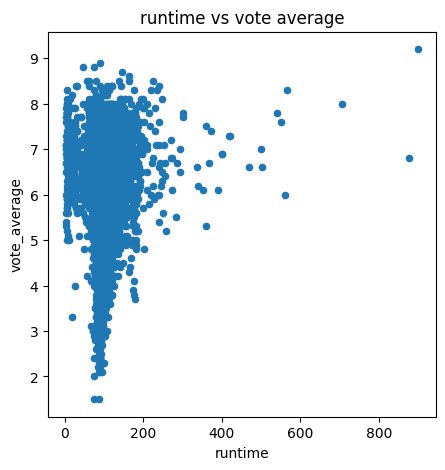

In [75]:
# plot scatter between movies duration and vote average
df.plot(kind='scatter',x='runtime',y='vote_average',figsize=(5,5),title='runtime vs vote average')

it's clear that Audiences are generally comfortable with movies that fall within range of [100-200] min so, it's clearly that people don't prefer long movies 

<a id='conclusions'></a>
## Conclusions

### Findings:
* Documentaries are praised for their educational value, storytelling, and impact, often earning higher ratings. In contrast, horror movies struggle to maintain high ratings due to their emphasis on fear and suspense.

* December movie releases consistently earn higher average ratings than those in other months due to factors like Holiday Season and family time 

* While a higher budget can boost revenue potential, success hinges on attention to critical production and distribution elements.

* The presence of high-profile actors noticeably influences a movie's revenue, as seen in the top ten actors identified. However, the adjusted revenue attributed to these actors is notably lower compared to the earnings of top-grossing actors.

* Audiences tend to favor movies with runtimes between 100 and 200 minutes, indicating a preference for moderate-length films over longer ones.

### additional research can be done on:

Understanding how audience preferences evolve can help make smarter decisions in the film industry.


### limitation:

* Half of the movies in the dataset have zero values for budget and revenue, indicating missing data. This limitation may affect the accuracy of the analysis. Proper handling of these missing values and seeking more comprehensive data are essential for reliable conclusions.
* Data separated by a pipe ("|") poses challenges in processing and analysis, demanding extra steps for accurate parsing and organization. Transitioning to lists instead of pipe-separated strings would simplify data handling, enhancing efficiency in processing and analysis.



## Submitting your Project 

In [76]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 540961 bytes to Investigate_a_Dataset.html
